In [1]:
import pandas as pd
import numpy as np
import scipy 
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt

In [3]:
kashti = sns.load_dataset("titanic")

In [4]:
kashti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
## Check normal distribution First


<AxesSubplot:xlabel='age', ylabel='Count'>

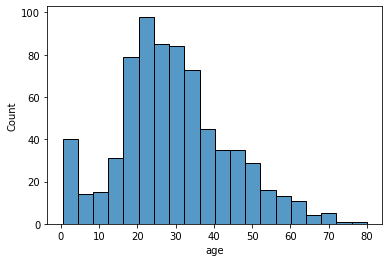

In [41]:
sns.histplot(kashti['age'])

In [42]:
#shipro wilk test

from scipy.stats import shapiro
shapiro(kashti['age'])

ShapiroResult(statistic=0.9814548492431641, pvalue=7.322165629375377e-08)

In [7]:
kashti.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
kashti.dropna(subset=["age"],axis=0,inplace=True)

In [9]:
kashti.isna().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

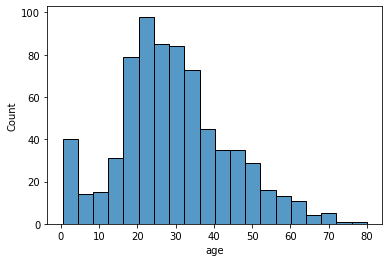

In [44]:
sns.histplot(kashti['age'])

#### The valies are same of shapiro test even after droping null values of age

In [43]:
from scipy.stats import shapiro
shapiro(kashti['age'])

ShapiroResult(statistic=0.9814548492431641, pvalue=7.322165629375377e-08)

In [29]:
df=kashti[["sex","age","fare","class"]]

In [30]:
df

,sex,age,fare,class
0,male,22.0,7.2500,Third
1,female,38.0,71.2833,First
2,female,26.0,7.9250,Third
3,female,35.0,53.1000,First
4,male,35.0,8.0500,Third
...,...,...,...,...
885,female,39.0,29.1250,Third
886,male,27.0,13.0000,Second
887,female,19.0,30.0000,First
889,male,26.0,30.0000,First


In [31]:
## implmenting ttest

import scipy.stats as stats
from scipy.stats import ttest_ind

## to compare male and female ages

df_male = df[df['sex'] =='male' ]
df_female = df[df['sex'] =='female' ]


# un=paired,two sample/ independant t-test


stats, p_value = ttest_ind(df_male['age'],df_female['age'])
 
if p_value > 0.05:
   print("The result is no significant")
else: 
   print("The result is non significant")


The result is non significant


In [32]:
# one sample ttest mean you hae to compare one catrgorical value compare with one variable-not a string


In [33]:
## implmenting ttest

import scipy.stats as stats
from scipy.stats import ttest_1samp

## to compare male and female ages

df_male = df[df['sex'] =='male' ]
df_female = df[df['sex'] =='female' ]


# un=paired,two sample/ independant t-test


stats, p_value = ttest_1samp(df_male['age'],34)
 
if p_value > 0.05:
   print("The result is no significant")
else: 
   print("The result is non significant")

The result is non significant
